# Healthy Food Access and Educational Success Prediction

The datasets used in this project comes from the Stanford Education Data Archive (SEDA) and USDA. 

# Fetching and Loading Data

In [4]:
import os
import numpy as np

DATA_PATH = os.path.join("datasets", "education")
SEDA_URL = DATA_PATH + "/seda_county_long_cs_5.0.csv"
USDA_FOOD_ENV_URL = os.path.join(DATA_PATH, "FoodEnvironmentAtlas", "StateAndCountyData.csv")
USDA_SNAP_ENV_URL = DATA_PATH + "/FoodEnvironmentAtlas.xls"

In [5]:
import pandas as pd

def load_data(file_path, sheet_name=None):
    file_extension = os.path.splitext(file_path)[1]
    if file_extension == '.csv':
        return pd.read_csv(file_path)
    elif file_extension == '.xls':
        return pd.read_excel(file_path, sheet_name=sheet_name)
    else:
        print("The file is neither an Excel file nor a CSV file.")

def merge_education_and_food_data(seda_df, usda_df):
    return pd.merge(seda_df, usda_df, left_on='sedacounty', right_on='FIPS', how='inner')

In [6]:
seda_df = load_data(SEDA_URL)
usda_food_df = load_data(USDA_FOOD_ENV_URL)

seda_df.head(), usda_food_df.head()

(   fips stateabb  sedacounty  sedacountyname subject  grade  year  cs_mn_all  \
 0     1       AL        1001  Autauga County     mth      3  2009   0.077141   
 1     1       AL        1001  Autauga County     rla      3  2009   0.131241   
 2     1       AL        1001  Autauga County     mth      3  2010  -0.164748   
 3     1       AL        1001  Autauga County     rla      3  2010   0.125892   
 4     1       AL        1001  Autauga County     mth      3  2011  -0.114523   
 
    cs_mn_se_all  tot_asmt_all  ...  tot_asmt_wbg  cs_mn_whg  cs_mn_se_whg  \
 0      0.082314           737  ...         701.0   0.425552      0.271431   
 1      0.062874           736  ...         700.0   0.134053      0.276166   
 2      0.056085           785  ...         744.0        NaN           NaN   
 3      0.054031           787  ...         747.0        NaN           NaN   
 4      0.071683           790  ...         759.0        NaN           NaN   
 
    tot_asmt_whg  cs_mn_wht  cs_mn_se_wht 

In [7]:
usda_snap_df = load_data(USDA_SNAP_ENV_URL, 'ASSISTANCE')

usda_snap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      3143 non-null   int64  
 1   State                     3143 non-null   object 
 2   County                    3143 non-null   object 
 3   REDEMP_SNAPS12            2901 non-null   float64
 4   REDEMP_SNAPS17            2895 non-null   float64
 5   PCH_REDEMP_SNAPS_12_17    2844 non-null   float64
 6   PCT_SNAP12                3143 non-null   float64
 7   PCT_SNAP17                3143 non-null   float64
 8   PCH_SNAP_12_17            3143 non-null   float64
 9   PC_SNAPBEN12              3087 non-null   float64
 10  PC_SNAPBEN17              3087 non-null   float64
 11  PCH_PC_SNAPBEN_12_17      3087 non-null   float64
 12  SNAP_PART_RATE11          3143 non-null   float64
 13  SNAP_PART_RATE16          3143 non-null   float64
 14  SNAP_OAP

# Data Exploration

SEDA dataset note:
- rla: Reading Language Arts.
- cs_mn_all: average composite score across grade.
- cs_mn_se_all: standard error of the composite score.

USDA dataset note:
- PCT_LACCESS_POP15: Percentage of the population with low access to healthy food in 2015.
- PCT_LACCESS_LOWI15: Percentage of low-income individuals with low access to healthy food in 2015.
- PCT_LACCESS_SNAP15: Percentage of SNAP recipients with low access to healthy food in 2015.
- PCT_LACCESS_CHILD15: Percentage of children with low access to healthy food in 2015.
- PCT_FREE_LUNCH15: Percentage of children with free lunch in 2015.
- PCT_REDUCED_LUNCH10: Percentage of children with reduced lunch in 2015.
- PCT_LACCESS_POP10: Percentage of the population with low access to healthy food in 2010.
- PCT_LACCESS_LOWI10: Percentage of low-income individuals with low access to healthy food in 2010.
- PCT_LACCESS_SNAP10: Percentage of SNAP recipients with low access to healthy food in 2010.
- PCT_LACCESS_CHILD10: Percentage of children with low access to healthy food in 2010.
- PCT_FREE_LUNCH10: Percentage of children with free lunch in 2010.
- PCT_REDUCED_LUNCH10: Percentage of children with reduced lunch in 2010.

In [10]:
print(f'Before filter:\nSEDA data size - {seda_df.size}\nUSDA data size - {usda_food_df.size}')
print('-' * 100)

# Create separate dataframes for data from 2010 and from 2015.
seda15_df = seda_df[(seda_df['year'] == 2015) & (seda_df['subject'] == 'rla')]
seda10_df = seda_df[(seda_df['year'] == 2010) & (seda_df['subject'] == 'rla')]

seda15_df = seda15_df[["sedacounty", "grade", "year", "cs_mn_all", "cs_mn_se_all"]]
seda10_df = seda10_df[["sedacounty", "grade", "year", "cs_mn_all", "cs_mn_se_all"]]

usda_food15_df = usda_food_df[usda_food_df['Variable_Code'].str.endswith('15', na=False)]
usda_food10_df = usda_food_df[usda_food_df['Variable_Code'].str.endswith('10', na=False)]

usda_snap10_df = usda_snap_df[['FIPS', 'PCT_FREE_LUNCH10', 'PCT_REDUCED_LUNCH10']].copy()
usda_snap15_df = usda_snap_df[['FIPS', 'PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15']].copy()

# Combine percent free and percent reduced lunch data
usda_snap10_df['PCT_FREE_REDUCED_LUNCH10'] = usda_snap10_df['PCT_FREE_LUNCH10'] + usda_snap10_df['PCT_REDUCED_LUNCH10']
usda_snap10_df.drop(columns=['PCT_FREE_LUNCH10', 'PCT_REDUCED_LUNCH10'], inplace=True)

usda_snap15_df['PCT_FREE_REDUCED_LUNCH15'] = usda_snap15_df['PCT_FREE_LUNCH15'] + usda_snap15_df['PCT_REDUCED_LUNCH15']
usda_snap15_df.drop(columns=['PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15'], inplace=True)

usda_food10_df = pd.merge(usda_food10_df, usda_snap10_df, on='FIPS', how='inner')
usda_food15_df = pd.merge(usda_food15_df, usda_snap15_df, on='FIPS', how='inner')

usda_food15_df = usda_food15_df[usda_food15_df['Variable_Code'].isin([
    'PCT_LACCESS_POP15',
    'PCT_LACCESS_LOWI15',
    'PCT_LACCESS_SNAP15',
    'PCT_LACCESS_CHILD15'
])]
usda_food10_df = usda_food10_df[usda_food10_df['Variable_Code'].isin([
    'PCT_LACCESS_POP10',
    'PCT_LACCESS_LOWI10',
    'PCT_LACCESS_SNAP10',
    'PCT_LACCESS_CHILD10'
])]

print(f'After filter:\nSEDA data size - {seda10_df.size}\nUSDA data size - {usda_food10_df.size}')
usda_food10_df.head()

Before filter:
SEDA data size - 19522195
USDA data size - 4264050
----------------------------------------------------------------------------------------------------
After filter:
SEDA data size - 86755
USDA data size - 56574


,FIPS,State,County,Variable_Code,Value,PCT_FREE_REDUCED_LUNCH10
1,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657,43.002827
3,1001,AL,Autauga,PCT_LACCESS_LOWI10,9.793530,43.002827
7,1001,AL,Autauga,PCT_LACCESS_CHILD10,8.837112,43.002827
24,1003,AL,Baldwin,PCT_LACCESS_POP10,19.318473,42.304278
26,1003,AL,Baldwin,PCT_LACCESS_LOWI10,5.460261,42.304278


In [11]:
merged10_df = merge_education_and_food_data(seda10_df, usda_food10_df)
merged15_df = merge_education_and_food_data(seda15_df, usda_food15_df)

merged10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52017 entries, 0 to 52016
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sedacounty                52017 non-null  int64  
 1   grade                     52017 non-null  int64  
 2   year                      52017 non-null  int64  
 3   cs_mn_all                 52017 non-null  float64
 4   cs_mn_se_all              52017 non-null  float64
 5   FIPS                      52017 non-null  int64  
 6   State                     52017 non-null  object 
 7   County                    52017 non-null  object 
 8   Variable_Code             52017 non-null  object 
 9   Value                     52017 non-null  float64
 10  PCT_FREE_REDUCED_LUNCH10  51603 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ MB


In [12]:
merged10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52017 entries, 0 to 52016
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sedacounty                52017 non-null  int64  
 1   grade                     52017 non-null  int64  
 2   year                      52017 non-null  int64  
 3   cs_mn_all                 52017 non-null  float64
 4   cs_mn_se_all              52017 non-null  float64
 5   FIPS                      52017 non-null  int64  
 6   State                     52017 non-null  object 
 7   County                    52017 non-null  object 
 8   Variable_Code             52017 non-null  object 
 9   Value                     52017 non-null  float64
 10  PCT_FREE_REDUCED_LUNCH10  51603 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ MB


In [13]:
merged10_df = merged10_df.drop(columns=['year', 'sedacounty', 'FIPS', 'cs_mn_se_all'], axis=1, errors='ignore')
merged15_df = merged15_df.drop(columns=['year', 'sedacounty', 'FIPS', 'cs_mn_se_all'], axis=1, errors='ignore')

In [14]:
reshaped10_df = merged10_df.copy()
reshaped15_df = merged15_df.copy()

# Reshape table to have the population data label as its own column with their
# respective values under them.
reshaped10_df = reshaped10_df.pivot(index=[
    'cs_mn_all',
    'grade',
    'State',
    'County',
    'PCT_FREE_REDUCED_LUNCH10'
], columns='Variable_Code', values='Value').reset_index()
reshaped10_df.sort_values(by=['State', 'County', 'grade'])
reshaped10_df = reshaped10_df.drop(columns=['State', 'County'], axis=1, errors='ignore')
reshaped10_df.dropna(subset=['PCT_FREE_REDUCED_LUNCH10'], inplace=True)

reshaped15_df = reshaped15_df.pivot(index=[
    'cs_mn_all',
    'grade',
    'State',
    'County',
    'PCT_FREE_REDUCED_LUNCH15'
], columns='Variable_Code', values='Value').reset_index()
reshaped15_df.sort_values(by=['State', 'County', 'grade'])
reshaped15_df = reshaped15_df.drop(columns=['State', 'County'], axis=1, errors='ignore')
reshaped15_df.dropna(subset=['PCT_FREE_REDUCED_LUNCH15'], inplace=True)


reshaped10_df.head(10)

Variable_Code,cs_mn_all,grade,PCT_FREE_REDUCED_LUNCH10,PCT_LACCESS_CHILD10,PCT_LACCESS_LOWI10,PCT_LACCESS_POP10
0,-2.686671,4,90.815451,2.382003,4.001295,9.012655
1,-1.622149,6,84.223301,14.544994,26.209751,40.829321
2,-1.566602,3,72.820204,28.633809,38.569784,78.014784
3,-1.548185,5,84.223301,14.544994,26.209751,40.829321
4,-1.494052,4,72.820204,28.633809,38.569784,78.014784
5,-1.416114,3,71.308523,5.714872,6.766688,25.521404
6,-1.407479,6,93.112411,0.388760,1.022883,2.265133
7,-1.397993,7,93.112411,0.388760,1.022883,2.265133
8,-1.343333,6,90.815451,2.382003,4.001295,9.012655
9,-1.341080,5,72.820204,28.633809,38.569784,78.014784


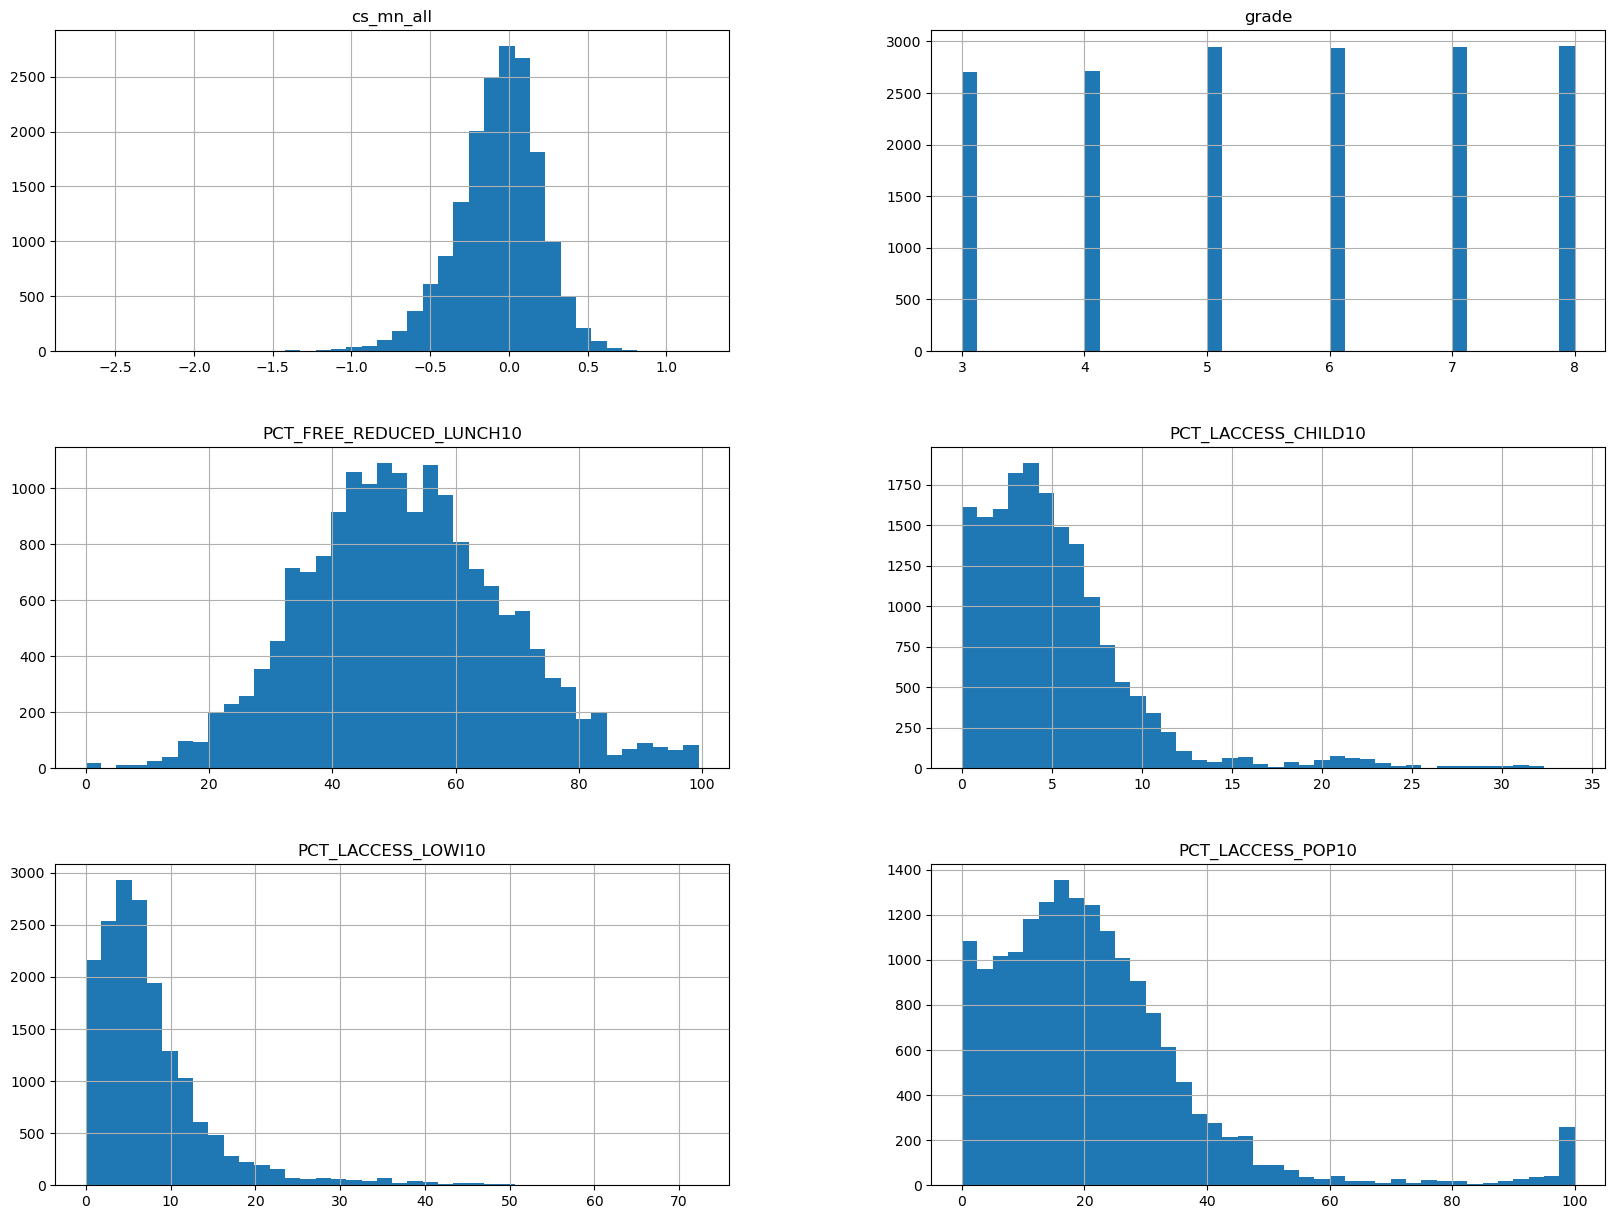

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
reshaped10_df.hist(bins=40, figsize=(20,15))
plt.show()

<Axes: xlabel='Variable_Code', ylabel='Variable_Code'>

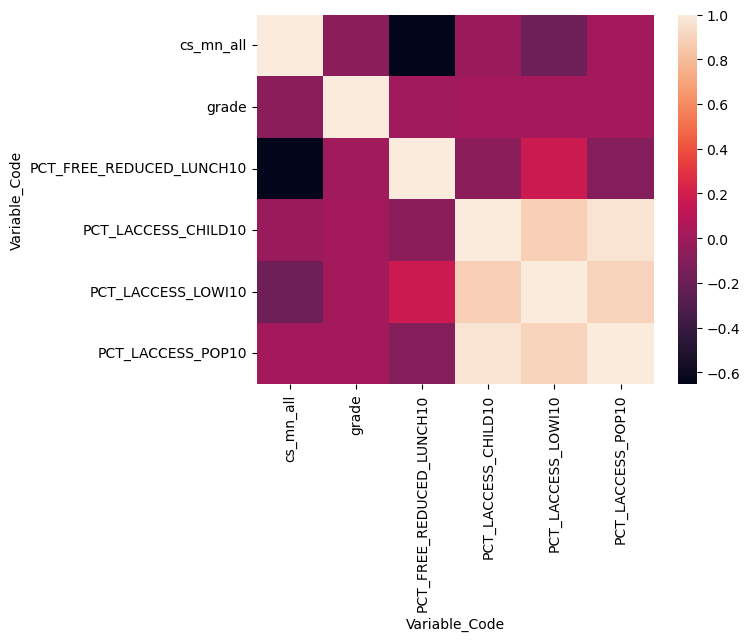

In [16]:
import seaborn as sns

corr = reshaped10_df.corr(numeric_only=True)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Data Observation

Based on the histogram, we can see that the standardized test scores are normally distributed as expected due to the way the data was normalized by SEDA beforehand. The test scores came from a similar number of students across the grade level (3rd - 8th). The shape of the graph for child with low access to healthy food (PCT_LACCESS_CHILD10) and population with low access to healthy food (PCT_LACCESS_POP10) is roughly similar, except the percentage for the child is lower than that of the population. This makes sense since children with low access to food are probably also included in the population with low access to food. What is surprising is that there are around 250 counties with close to 100% of low access to healthy food, yet there isn’t any county with close to 100% low-income individuals with low access to healthy food. As for the correlation matrix, there appears to be low inverse correlation between the test scores and low access to healthy food.

## Check Feature Variance Via PCA

In [20]:
from sklearn.preprocessing import StandardScaler

X = reshaped10_df[['PCT_FREE_REDUCED_LUNCH10', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_POP10', 'PCT_LACCESS_LOWI10']]
y = reshaped10_df['cs_mn_all']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

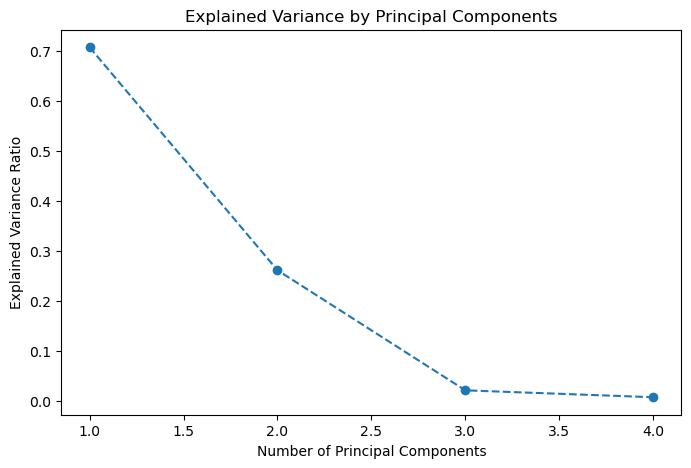

Cumulative Explained Variance: [0.70765937 0.96963455 0.99169647 1.        ]


In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

PCA indicated that the first principal component (PC) contributed 70.8% of the variance and the second PC contributed 26.1% of the variance, which sums up to roughly 97% of the overall variance. This warrant for using PCA to reduce the data dimensionality to 2. Although the third PC contributed little to the overall variance, it is included to get a better sense of the data.

# Testing Different Models

## Predicting Using Linear Regression

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=reshaped10_df['grade'], random_state=42
)

In [28]:
# Verify split
train_dist = reshaped10_df.loc[X_train.index, 'grade'].value_counts(normalize=True)
test_dist = reshaped10_df.loc[X_test.index, 'grade'].value_counts(normalize=True)
train_dist, test_dist

(grade
 8    0.172020
 7    0.171439
 5    0.171003
 6    0.170785
 4    0.157558
 3    0.157195
 Name: proportion, dtype: float64,
 grade
 8    0.172043
 7    0.171462
 5    0.171171
 6    0.170590
 4    0.157512
 3    0.157222
 Name: proportion, dtype: float64)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
    ('st_scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('linear_regression', LinearRegression())
])

pipe_lr.fit(X_train, y_train)
y_train_pred = pipe_lr.predict(X_train)
y_test_pred = pipe_lr.predict(X_test)

In [30]:
def plot_predicted_vs_actual(y_test, y_pred, title):
    x_range = [min(y_test), max(y_test)]
    y_range = [min(y_test), max(y_test)]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.plot(x_range, y_range, color='red', linestyle='--', label='Perfect Fit Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

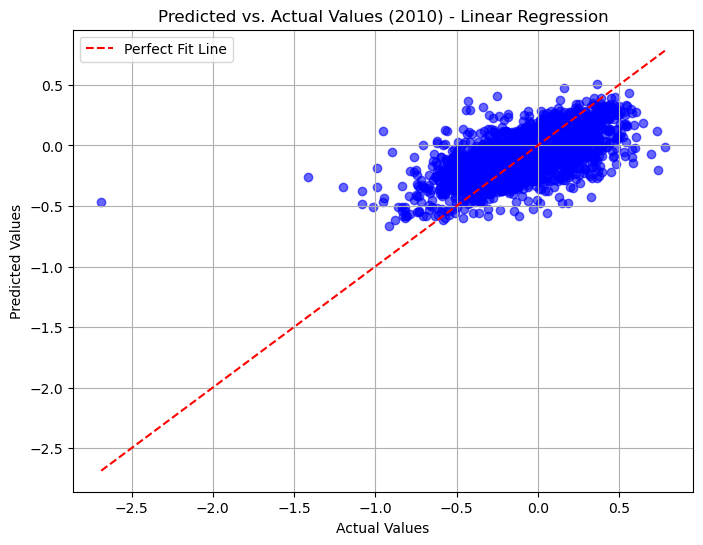

In [31]:
plot_predicted_vs_actual(
    y_test, y_test_pred, 'Predicted vs. Actual Values (2010) - Linear Regression'
)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

def display_scores(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(rmse)
    r2 = r2_score(y_test, y_pred)
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')

In [33]:
print("Training scores:")
display_scores(y_train, y_train_pred)

Training scores:
RMSE: 0.1982364080578082
R2: 0.4398104279718036


In [34]:
print("Testing scores:")
display_scores(y_test, y_test_pred)

Testing scores:
RMSE: 0.197358103847991
R2: 0.4069721408045146


The default hyperparameters were used when training the model using Linear Regression. The dataset is not manipulated in any ways, other than removing NaN rows and standardizing using standard scaler, we can leave the fit_intercept as making no assumption on the data. Computation time isn’t that important for the size of the dataset and number of features, so n_jobs can remain default. The hyperparameters are as follows:
- fit_intercept: True, default value
- n_jobs: None, default value

Linear Regression is first used to test whether the dataset have linear relationships. While the root mean squared error (RMSE) and r-squared scores suggest the model is neither overfitting nor underfitting due to their closeness, it is still a poor predictive model due to the low r-squared score of less than 0.5. When graphing the predicted vs actual values, the points are scattered around the perfect fit line with a couple of outliers. If the model is good, the points should be closely around the perfect fit line.


### Test Model Against 2015 Data

In [37]:
# Rename column to see how well model generalizes on data from 2015
reshaped15_df.rename(columns={
    'PCT_FREE_REDUCED_LUNCH15': 'PCT_FREE_REDUCED_LUNCH10',
    'PCT_LACCESS_CHILD15': 'PCT_LACCESS_CHILD10',
    'PCT_LACCESS_LOWI15': 'PCT_LACCESS_LOWI10',
    'PCT_LACCESS_POP15': 'PCT_LACCESS_POP10',
    'PCT_LACCESS_SNAP15': 'PCT_LACCESS_SNAP10'
}, inplace=True)
X15 = reshaped15_df[['PCT_FREE_REDUCED_LUNCH10', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_POP10', 'PCT_LACCESS_LOWI10']].copy()			

y15 = reshaped15_df['cs_mn_all']
_, X15_test, _, y15_test = train_test_split(
    X15, y15, test_size=0.2, stratify=reshaped15_df['grade'], random_state=42
)

y15_pred = pipe_lr.predict(X15_test)

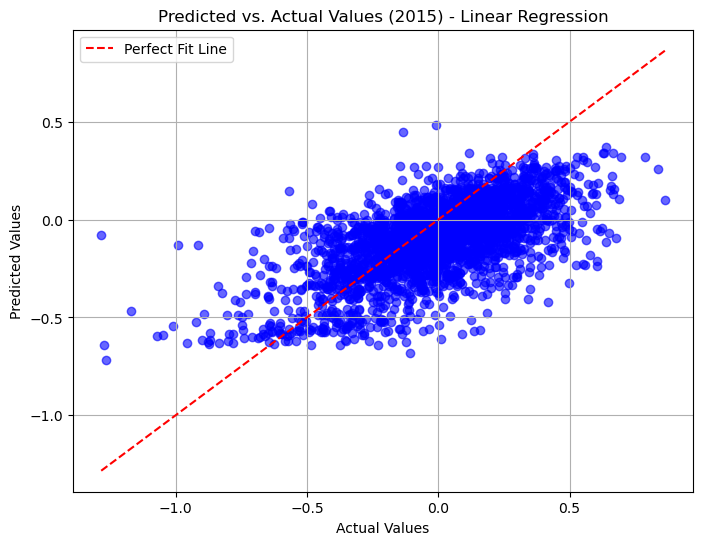

In [38]:
plot_predicted_vs_actual(
    y15_test, y15_pred, 'Predicted vs. Actual Values (2015) - Linear Regression'
)

In [39]:
display_scores(y15_test, y15_pred)

RMSE: 0.22956779808171776
R2: 0.2772929600473818


To further examine how well the model generalizes against a completely different dataset, the model is tested against the 2015 dataset. Unexpectedly, it performed much worse with points scattering all over the place. The RMSE and r-squared scores are 0.23 and 0.272 respectively. This suggest that the model is making better predictions using the 2015 dataset but less effective in explaining the variance in the dataset. It is interesting that the model is a better fit for the 2015 data since the economic factors between the two years differ, so the relationships between the features might change. Overall, based on the result, it seems that the dataset has a non-linear relationship, and Linear Regression would not be enough to create a good enough model for it.

## Predicting Using Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
pipe_rf = Pipeline([
    ('pca', PCA(n_components=3)),
    ('rf_regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipe_rf.fit(X_train, y_train)
y_train_pred = pipe_rf.predict(X_train)
y_test_pred = pipe_rf.predict(X_test)

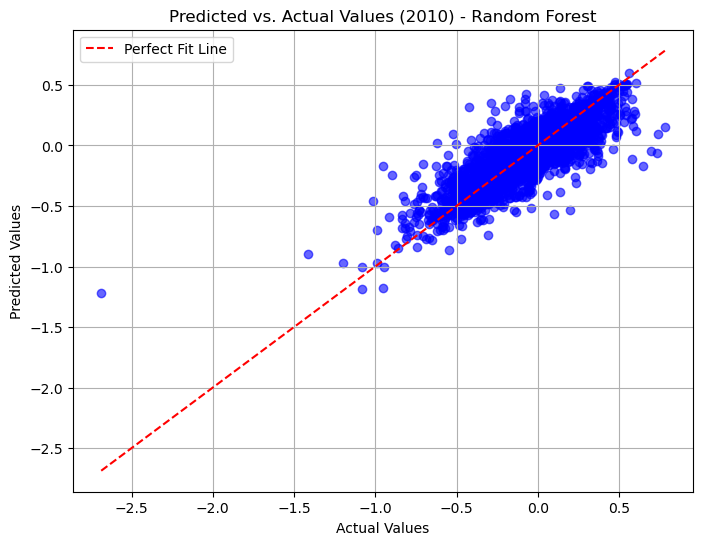

In [44]:
plot_predicted_vs_actual(
    y_test, y_test_pred, 'Predicted vs. Actual Values (2010) - Random Forest'
)

In [45]:
print("Training scores:")
display_scores(y_train, y_train_pred)

Training scores:
RMSE: 0.11236009137411465
R2: 0.8200332193826427


In [46]:
print("Testing scores:")
display_scores(y_test, y_test_pred)

Testing scores:
RMSE: 0.1442901754231338
R2: 0.6830150149601826


Most of the hyperparameter values used are the default value to get an initial feel of how the model performs before diving deeper and performing parameter tuning. The hyperparameters used for the Random Forest model are as follows:
- n_estimators = 100, default value
- max_depth = None, default value
- min_samples_split = 2, default value
- min_samples_leaf = 1, default value
- min_weight_fraction_leaffloat = 0.0, default value
- max_features = sqrt, default value
- max_leaf_nodes = None, default value
- random_state = 42
- class_weight = None, default value

Surprisingly, the model created using Random Forest performed much better than the model created by Linear Regression, though it is still lacking. When the predicted values and actual values are plotted against each other, they are more closely aligned to the perfect fit line, meaning it is better at predicting the result than using Linear Regression. A 0.683 r-squared score suggest that the model captured a significant portion of the data’s variability despite using default hyperparameters. The lower r-squared score and higher RMSE score (training vs testing) suggest that the model is overfitting. The model should improve after tuning the hyperparameters.

### Test Model Against 2015 Data

In [49]:
y15_pred = pipe_rf.predict(X15_test)

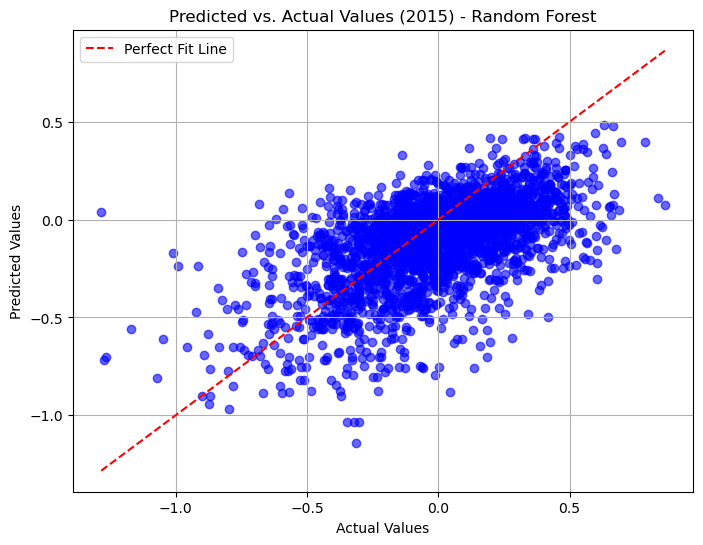

In [50]:
plot_predicted_vs_actual(
    y15_test, y15_pred, 'Predicted vs. Actual Values (2015) - Random Forest'
)

In [51]:
display_scores(y15_test, y15_pred)

RMSE: 0.24822050725369027
R2: 0.15507985388813172


When tested against the 2015 dataset, it performed with a similar RMSE of 0.48 and a significantly worse r-squared score of 0.272. The r-squared score is about as bad as that of the linear regression model on the 2015 dataset. As explained previously, the much worse scores might be due to economic factors of the different fiscal years affecting the features differently. Hypertuning the hyperparameters might result in a better predictive model for the 2010 dataset, but not much for the 2015 dataset.


## Detecting Abnormal Districts Using One-Class SVM

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.svm import OneClassSVM

gamma = nu = 0.1
oc_svm = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
oc_svm.fit(X_train_scaled)

y_pred = oc_svm.predict(X_test_scaled)

In [56]:
scores = oc_svm.decision_function(X_test_scaled)

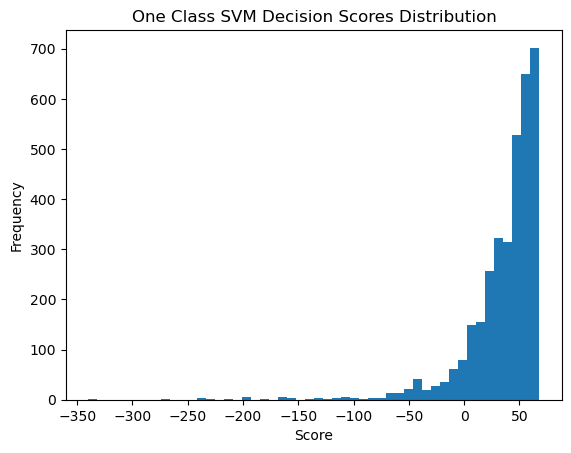

In [57]:
plt.hist(scores, bins=50)
plt.title('One Class SVM Decision Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [58]:
outlier_percent = (y_pred == -1).mean() * 100
print(f'Percentage outliers: {outlier_percent:.2f}%')

Percentage outliers: 9.62%


Since the One-Class SVM does not help with the business objective of this project, default values or very small numbers are used for the hyperparameters. The hyperparameters used are as follows:
- kernel = rbf, default value
- degree = 3, default value
- gamma = 0.1
- coef0 = 0.0, default value
- nu = 0.1
- max_iter = -1, default value

The last model used is the One-Class SVM, which is an unsupervised learning model. The use case for this model will differ from the main use case. The One-Class SVM model is used to detect abnormalities in the districts. Interestingly enough, the percentage outliers predicted by the model is 9.85%. The feature histograms do show some level of outliers, but the level predicted by the model indicated that there might be far more outliers. There might be issue with the data collection process or there are indeed a number of counties that are living in what USDA considered low access to healthy food. The validity of the model cannot be determined due to not being a subject matter expert. There is also no information to validate the result of the SVM.

n_estimators = 100, default value\
max_depth = None, default value\
min_samples_splitint = 2, default value\
min_samples_leaf = 1, default value\
min_weight_fraction_leaffloat = 0.0, default value\
max_features = sqrt, default value\
max_leaf_nodes = None, default value\
random_state = 42\
class_weight = None, default value

## Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

n_estimators = [10, 25, 50, 100, 150]
max_depth = [None, 3, 5, 10, 20]
min_sample_split = [2, 5, 10]
min_samples_leaf = [0.5, 1, 5]
max_features = [1.0, 'sqrt', 'log2']

param_grid = [
    {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
        'min_samples_split': min_sample_split,
        'min_samples_leaf': min_samples_leaf
    },
    {
        'bootstrap': [False],
        'n_estimators': n_estimators[:3],
        'max_depth': max_depth[:3],
        'max_features': max_features,
        'min_samples_split': min_sample_split[:2],
        'min_samples_leaf': min_samples_leaf[:2]
    },
]

In [63]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [None, 3, 5, 10, 20],
                          'max_features': [1.0, 'sqrt', 'log2'],
                          'min_samples_leaf': [0.5, 1, 5],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [10, 25, 50, 100, 150]},
                         {'bootstrap': [False], 'max_depth': [None, 3, 5],
                          'max_features': [1.0, 'sqrt', 'log2'],
                          'min_samples_leaf': [0.5, 1],
                          'min_samples_split': [2, 5],
                          'n_estimators': [10, 25, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [65]:
rf_best_model = grid_search.best_estimator_
rf_best_model

RandomForestRegressor(max_features='sqrt', min_samples_split=5,
                      n_estimators=150, random_state=42)

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2648848131086236 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 0.5, 'min_samples_split': 2, 'n_estimators': 10}
0.2648716602032441 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 0.5, 'min_samples_split': 2, 'n_estimators': 25}
0.26487287853827934 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 0.5, 'min_samples_split': 2, 'n_estimators': 50}
0.26487332849142464 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 0.5, 'min_samples_split': 2, 'n_estimators': 100}
0.2648728647706553 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 0.5, 'min_samples_split': 2, 'n_estimators': 150}
0.2648848131086236 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 0.5, 'min_samples_split': 5, 'n_estimators': 10}
0.2648716602032441 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 0.5, 'min_samples_split': 5, 'n_estimators': 25}
0.26487287853827934 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 0.5, 'min_sa

In [67]:
y_train_pred = rf_best_model.predict(X_train)
y_test_pred = rf_best_model.predict(X_test)

print("Training scores:")
display_scores(y_train, y_train_pred)

Training scores:
RMSE: 0.11244286783298459
R2: 0.8197679561562102


In [68]:
print("Testing scores:")
display_scores(y_test, y_test_pred)

Testing scores:
RMSE: 0.1439464243979298
R2: 0.6845235600523512


In [69]:
rf_best_model.score(X_test, y_test)

0.6845235600523512

The GridSearchCV results indicated that the hyperparameters min_samples_split and n_estimators should be adjusted from 2 to 5 and from 100 to 150 respectively. All other hyperparameters remain unchanged. Upon inspecting the testing RMSE and r-squared scores, the best model identified by GridSearchCV scored 0.1439 and 0.6845 respectively. These results are slightly worse than those of the initial model of mostly default hyperparameters, which scored 0.1443 and 0.683 respectively. This is unusual as the hyperparameters of the initial model were tested in GridSearchCV. Compared to the training RMSE score of 0.1124 and r-squared score of 0.8198, the lower r-squared score and higher RMSE score suggest that the model is overfitting.

## Modeling with Stacking

In [72]:
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR

In [73]:
estimators = [
    ('rf', rf_best_model),
    ('lr', LinearRegression()),
    ('svr', SVR(kernel='rbf'))
]

stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

stacking.fit(X_train, y_train)
y_train_pred = stacking.predict(X_train)
y_test_pred = stacking.predict(X_test)

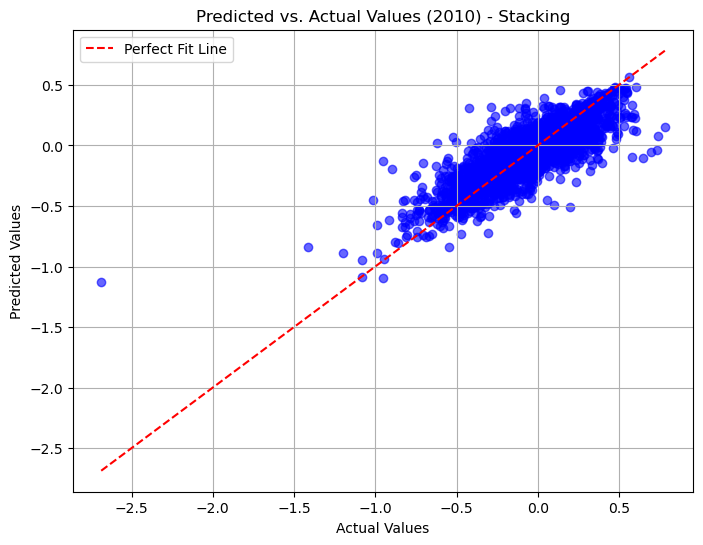

In [74]:
plot_predicted_vs_actual(
    y_test, y_test_pred, 'Predicted vs. Actual Values (2010) - Stacking'
)

In [75]:
print("Training scores:")
display_scores(y_train, y_train_pred)

Training scores:
RMSE: 0.11429351991675687
R2: 0.8137864000010415


In [76]:
print("Testing scores:")
display_scores(y_test, y_test_pred)

Testing scores:
RMSE: 0.14281217500467785
R2: 0.6894756688133429


Stacking improved the testing RMSE and r-squared scores slightly with the values of 0.1428 and 0.6895. The training RMSE and r-squared scores are 0.1124 and 0.8198 respectively, which indicate the model is still overfitting. In the future, I will try using a simpler model that is something in between Linear Regression and RandomForest.

## Testing with Other Models

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [81]:
display_scores(y_train, y_train_pred)

RMSE: 0.11200851294695043
R2: 0.8211577013250799


In [82]:
display_scores(y_test, y_test_pred)

RMSE: 0.14583069173411004
R2: 0.6762102921953401


In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
pipe_poly = Pipeline([
    ('poly', PolynomialFeatures()),
    ('st_scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('linear_regression', LinearRegression())
])

pipe_poly.fit(X_train, y_train)
y_train_pred = pipe_poly.predict(X_train)
y_test_pred = pipe_poly.predict(X_test)

In [85]:
display_scores(y_train, y_train_pred)

RMSE: 0.1980718775198031
R2: 0.4407399246677215


In [86]:
display_scores(y_test, y_test_pred)

RMSE: 0.19767910372927203
R2: 0.40504147082954634


In [87]:
pipe_svr = Pipeline([
    ('st_scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svr', SVR(kernel='rbf'))
])

pipe_svr.fit(X_train, y_train)
y_train_pred = pipe_svr.predict(X_train)
y_test_pred = pipe_svr.predict(X_test)

In [88]:
display_scores(y_train, y_train_pred)

RMSE: 0.19362918545301983
R2: 0.46554663313419153


In [89]:
display_scores(y_test, y_test_pred)

RMSE: 0.19460370643240343
R2: 0.42340963169661683


In [90]:
pipe_svr.score(X_test, y_test)

0.42340963169661683